In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from scipy import stats

from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\INeuron\Full Stack data science\Coding\ML\Job_Project\Cleaned_Data.csv",index_col=0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>, <Axes: >, <Axes: >]],
      dtype=object)

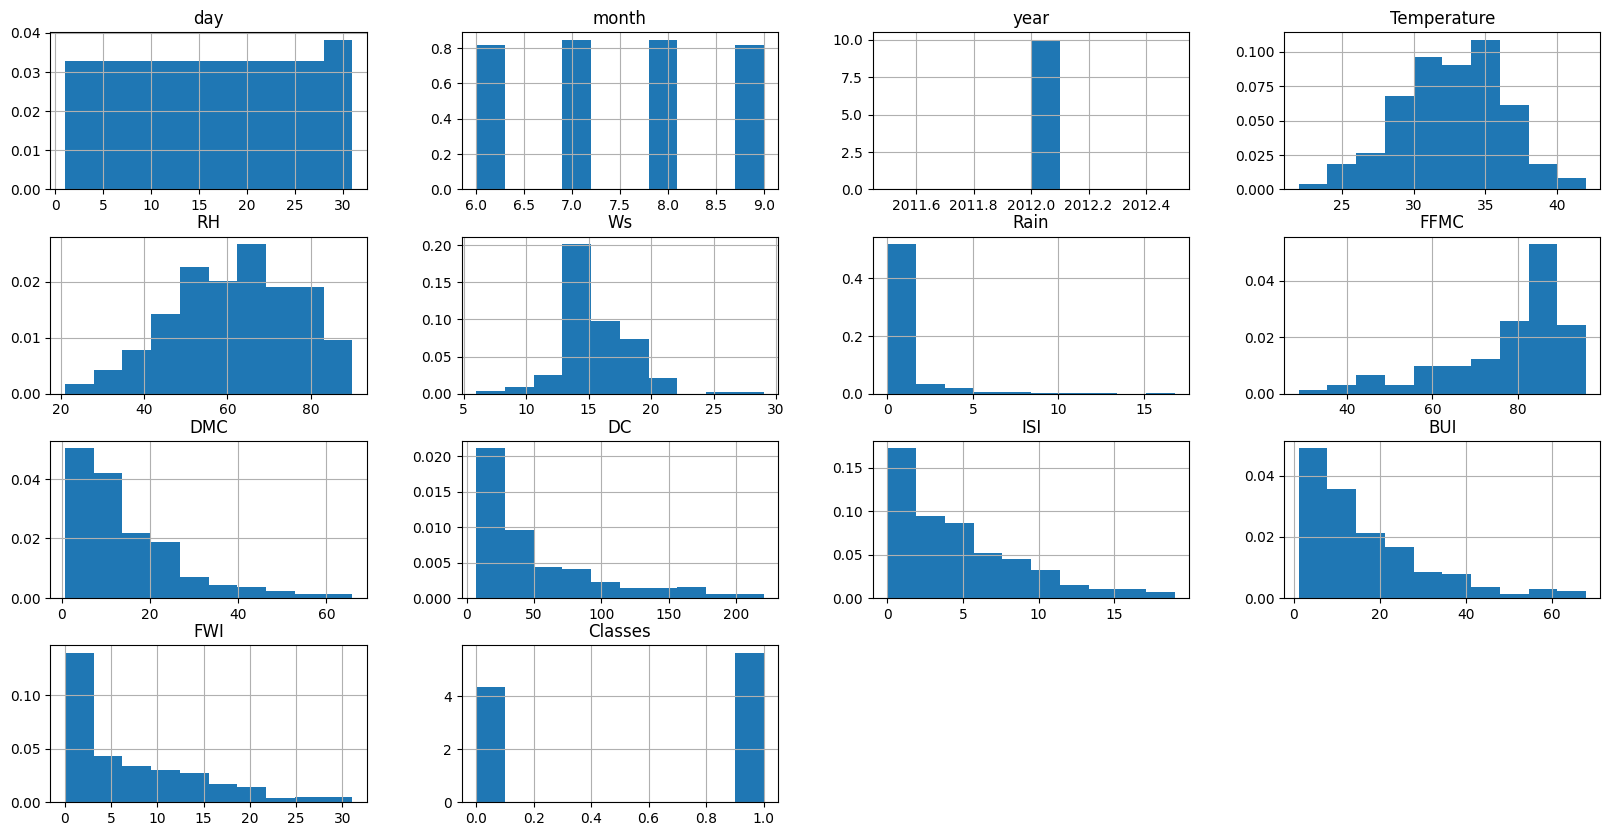

In [4]:
df.hist(density=True,figsize=(20,10))

# Observation 1: From the above plots, we can see that there are mixture of positive skews & negative skews amonth the attributes.
# Observation 2: For year plot we could see the value is contant for entire dataset. so we can remove that feature.

([<matplotlib.axis.XTick at 0x29b1390e290>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

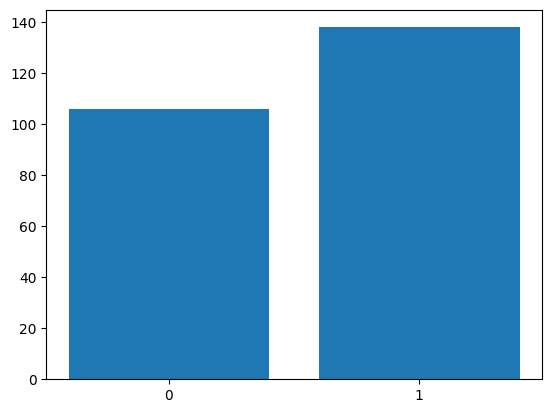

In [5]:
classes=df.groupby(['Classes'])['Classes'].count()
plt.bar(classes.index,classes)
plt.xticks([0,1])                   # 0 -> no fire   # 1-> fire

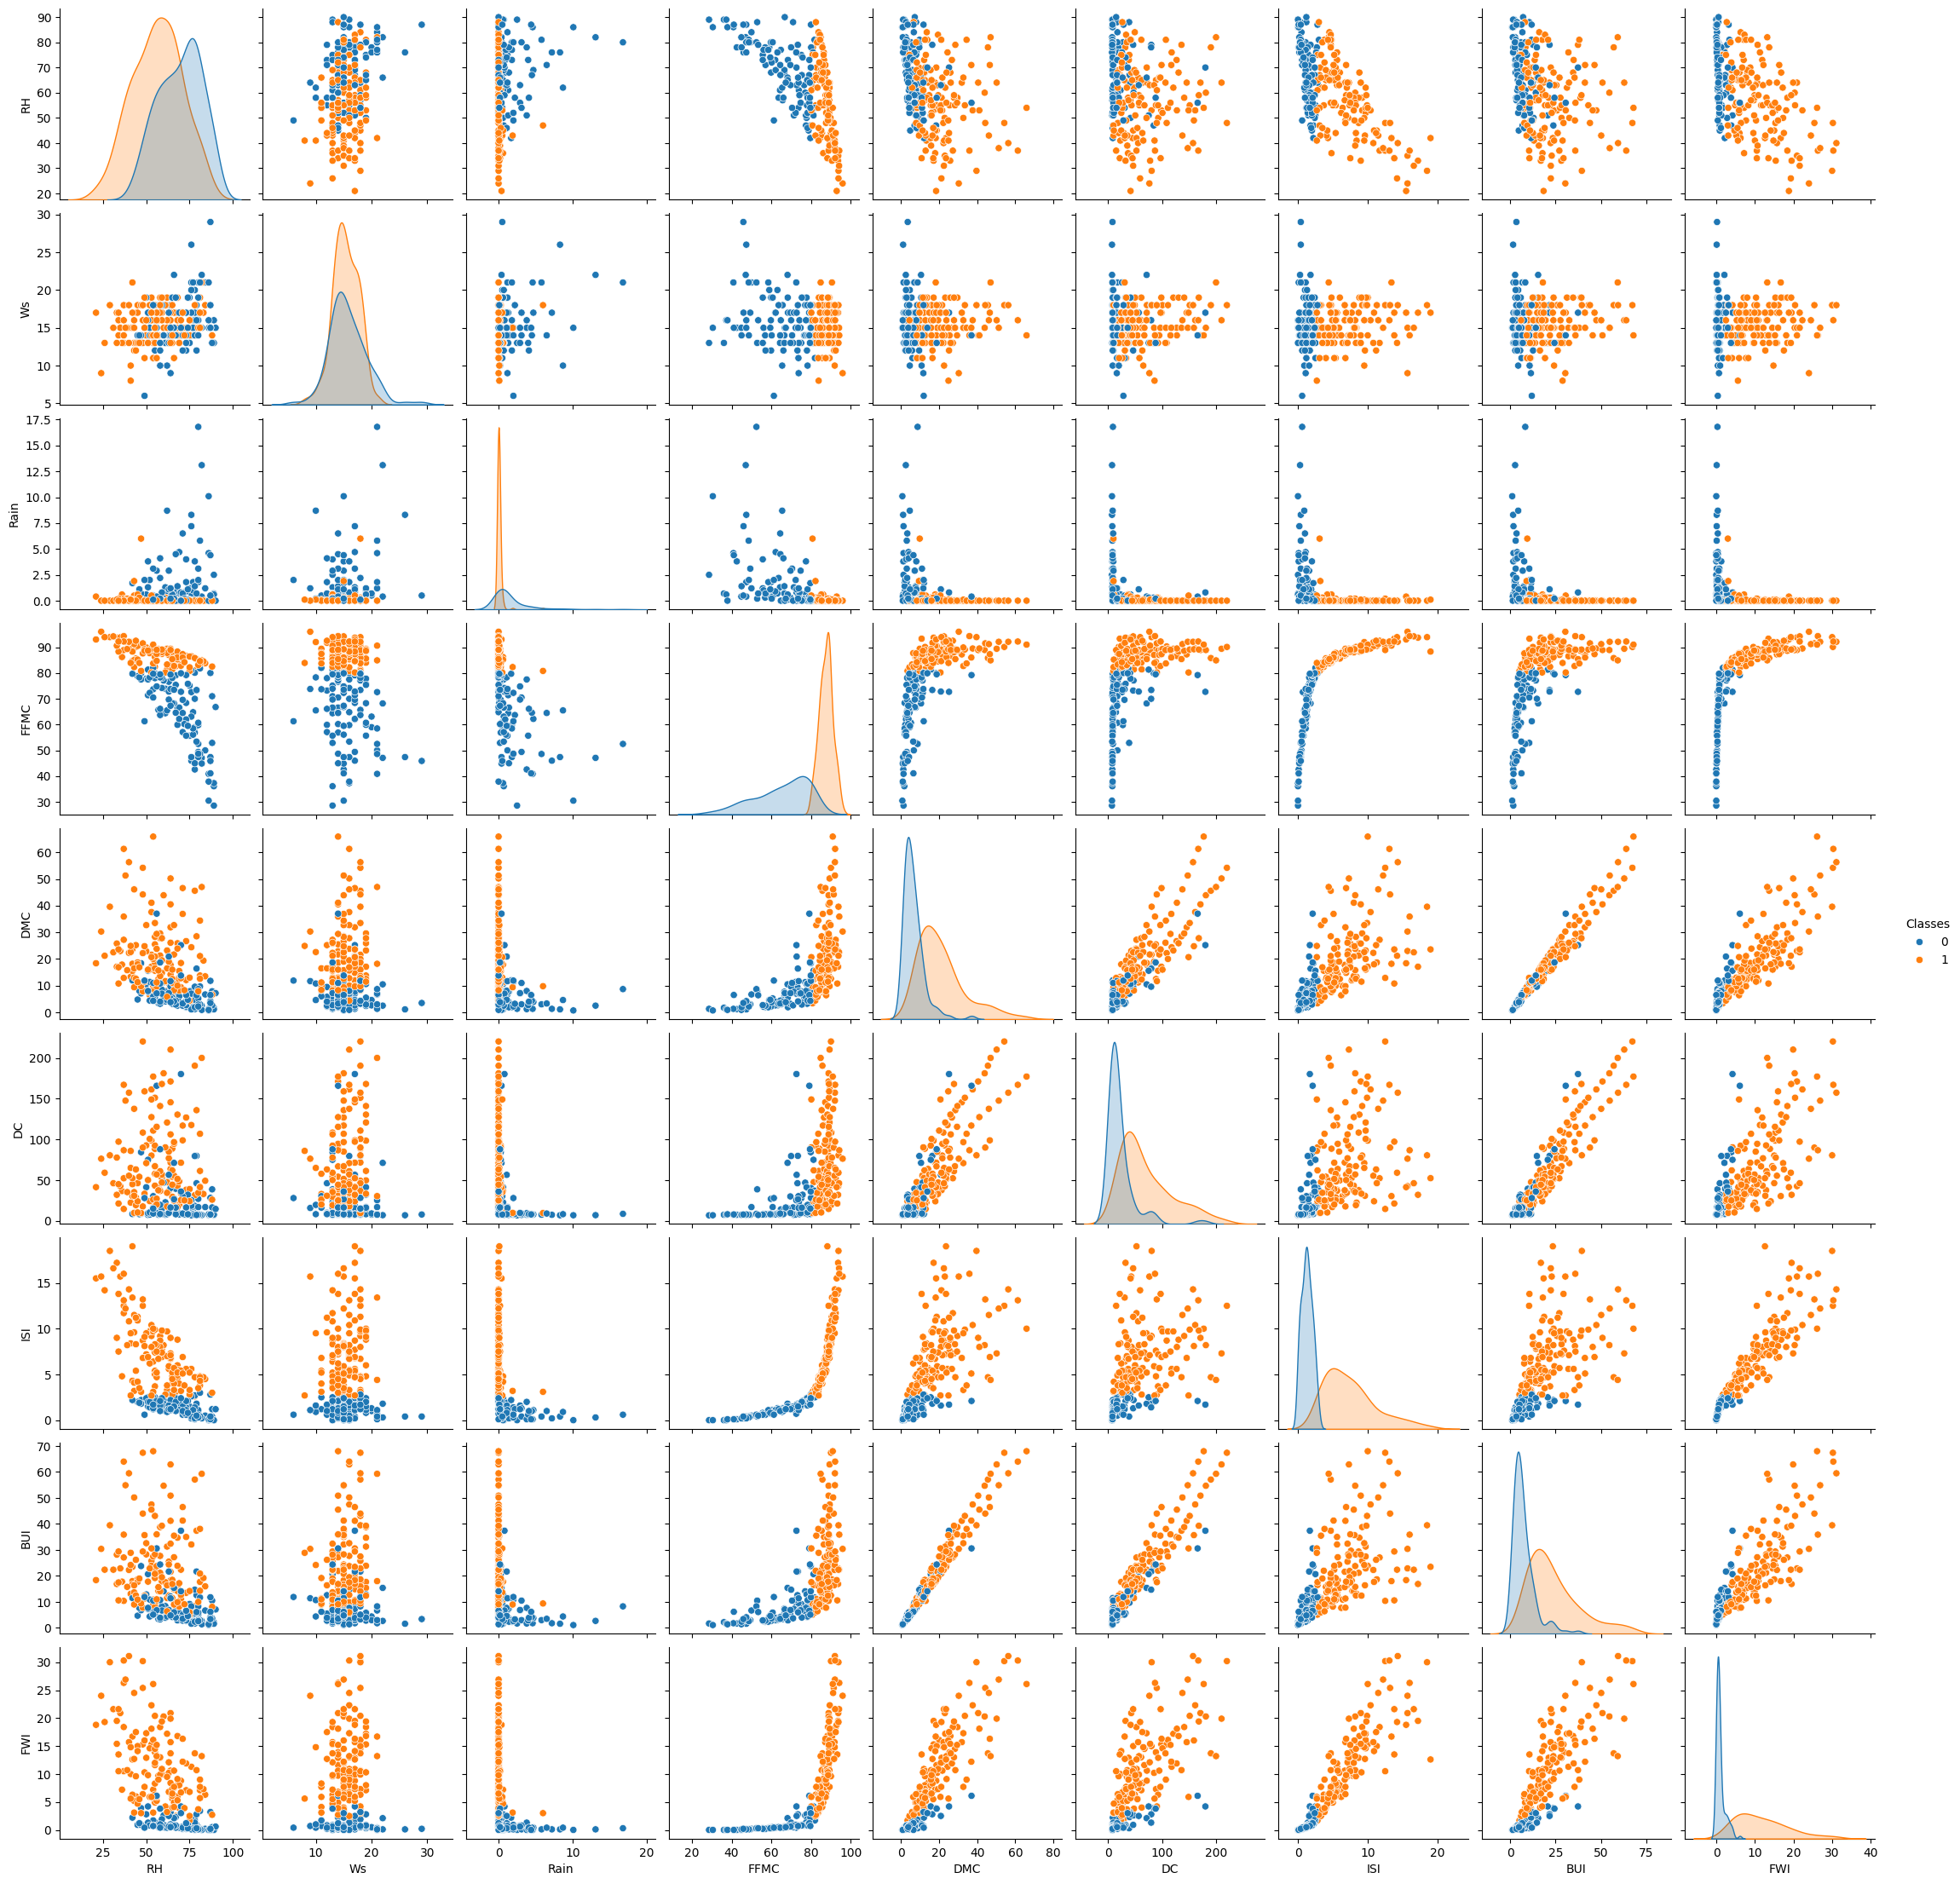

In [6]:

sns.pairplot(df.drop(columns=['day','month','year','Temperature']),hue='Classes')

In [7]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350214,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.081705,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566898,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580536,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.034005,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324762,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691455,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875161,0.584188
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.736990,0.507132


<Axes: >

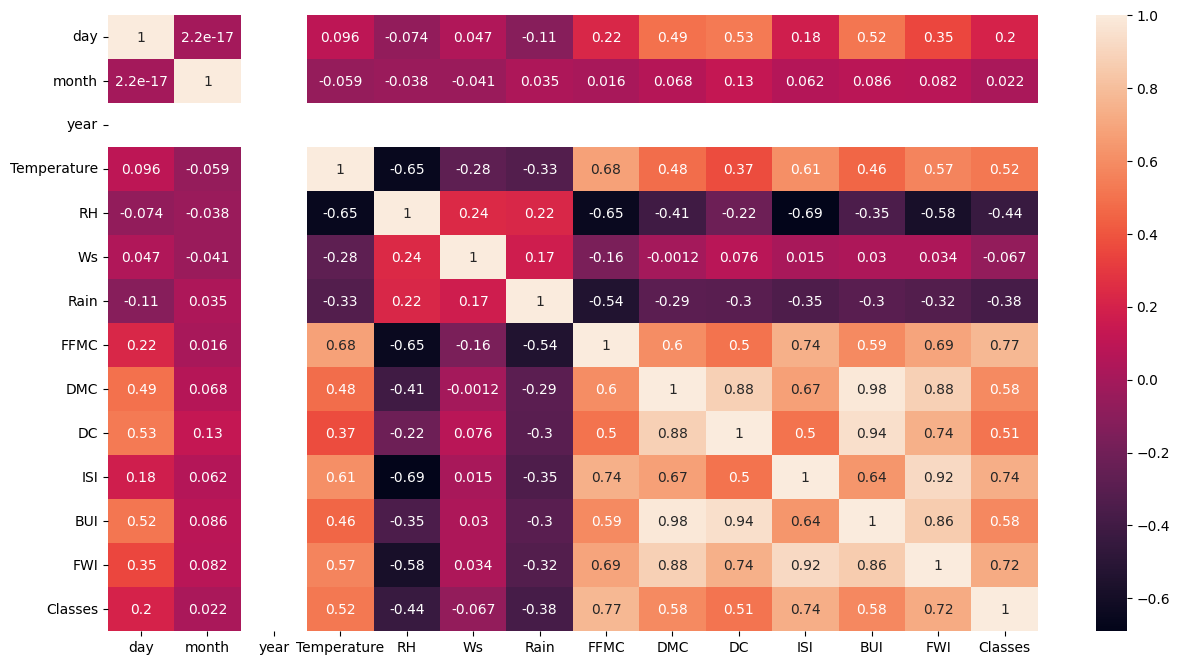

In [8]:
fig, ax =plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,ax=ax)

# Observation 1: From the above heat map, we could see there is a huge collinearity in BUI with the features DMC & DC. So we can remove those 2 features as it wont give any addition information.

# Observation 2: Year feature has no collinearity as it has a constant value over the entire dataset. So we can remove those feature as well.

In [19]:
#Need to check the outliers
df_temp=df.drop(columns=['day','month','year','Temperature','Classes'],axis=1)
'''
for feature in df_temp.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(df[feature],orient='h')
    plt.title(feature)
'''

"\nfor feature in df_temp.columns:\n    plt.figure(figsize=(8,2))\n    sns.boxplot(df[feature],orient='h')\n    plt.title(feature)\n"

<Axes: >

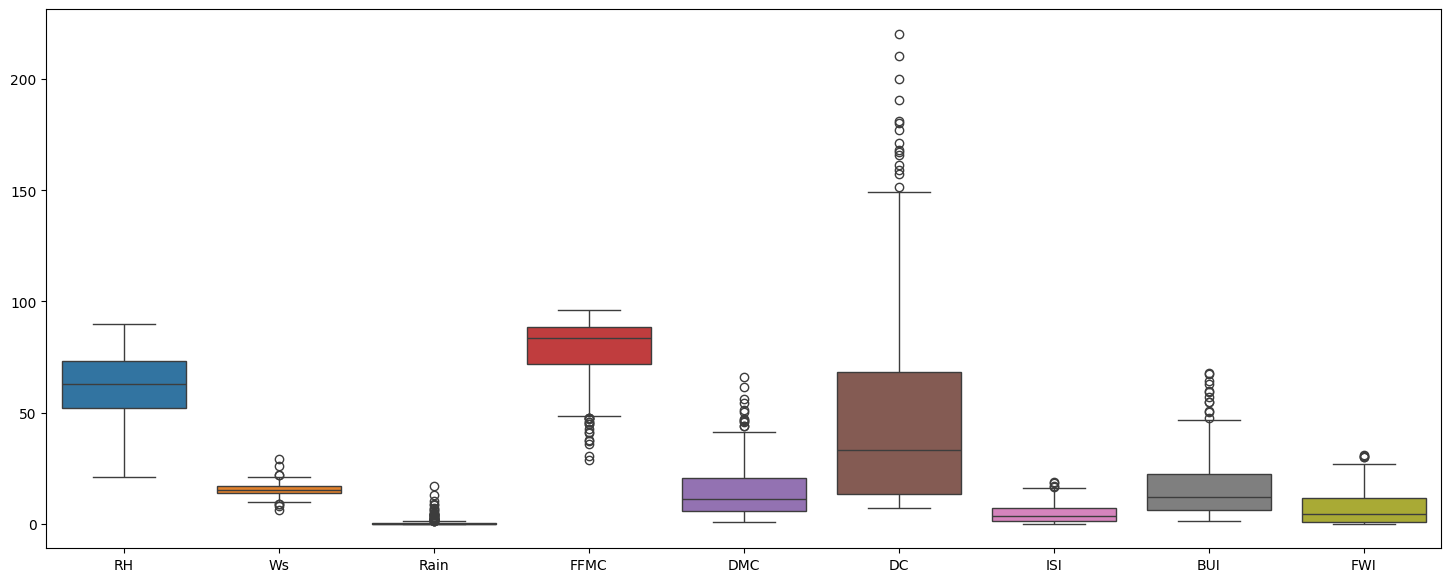

In [18]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df_temp)

# Observation: We could see most of the features are having the outliers in their data.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

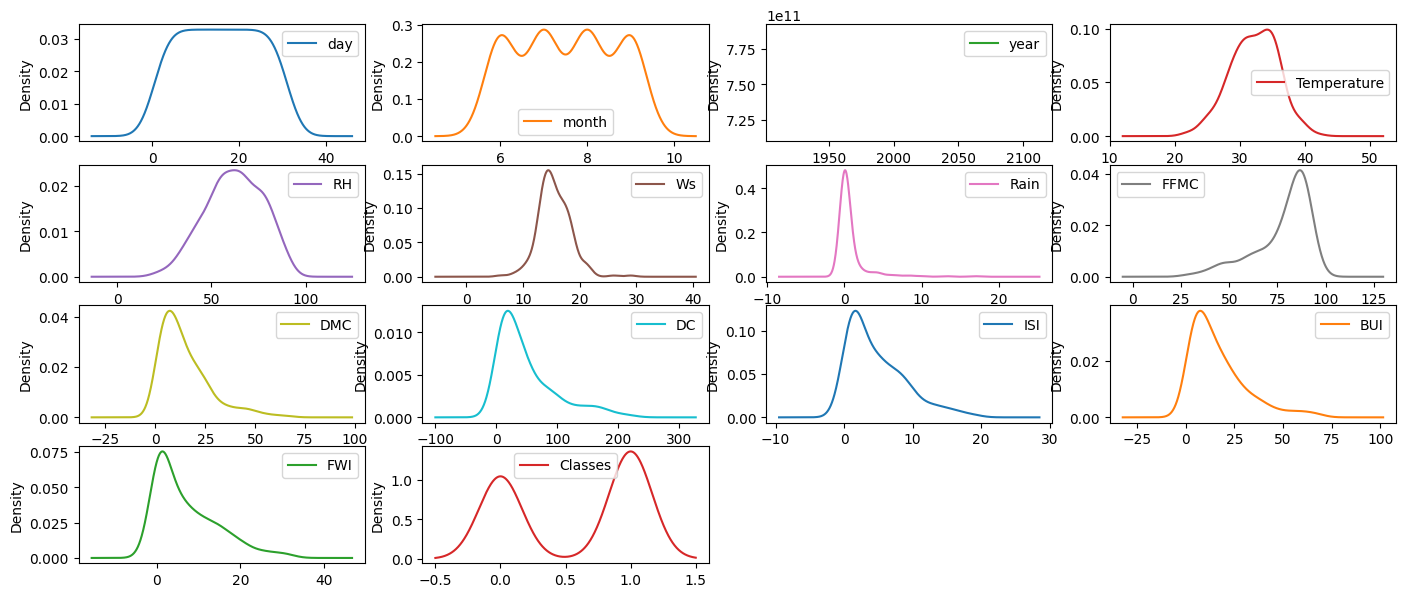

In [28]:
fig,ax = plt.subplots(figsize=(17,7))
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False,sharey=False,ax=ax)

In [69]:
def log_trans(df,var):
    t=np.log(df[var])
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.histplot(df[var],kde='True')
    plt.title('Before Log Transformer')
    plt.subplot(122)
    sns.histplot(t,kde=True)
    plt.title('After Log Transformer')

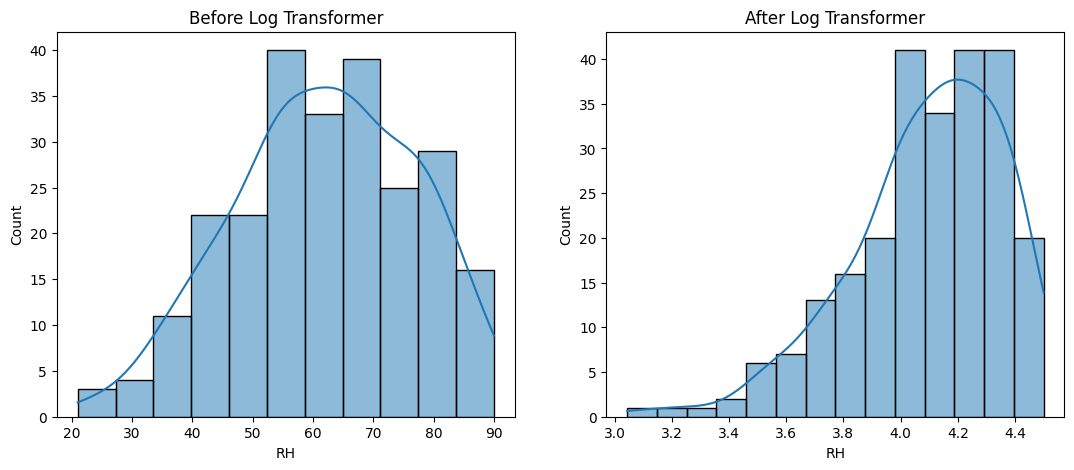

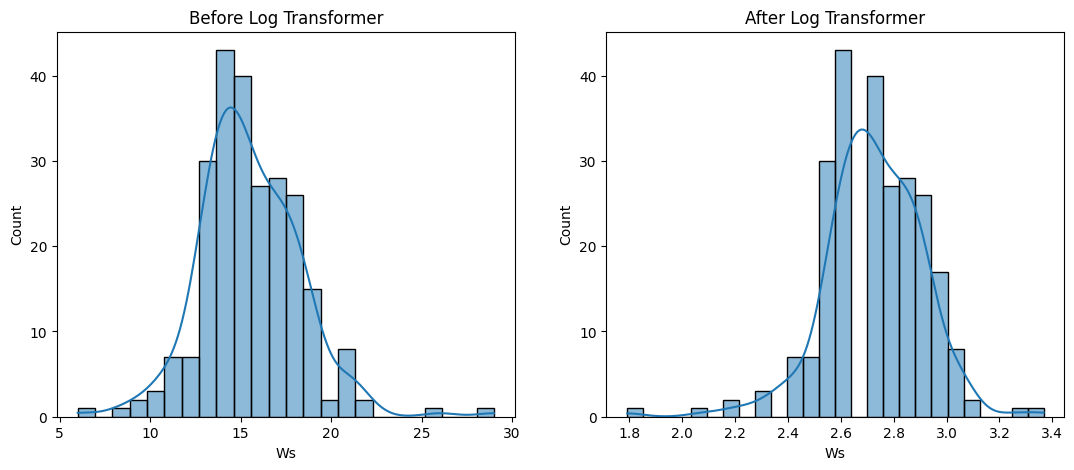

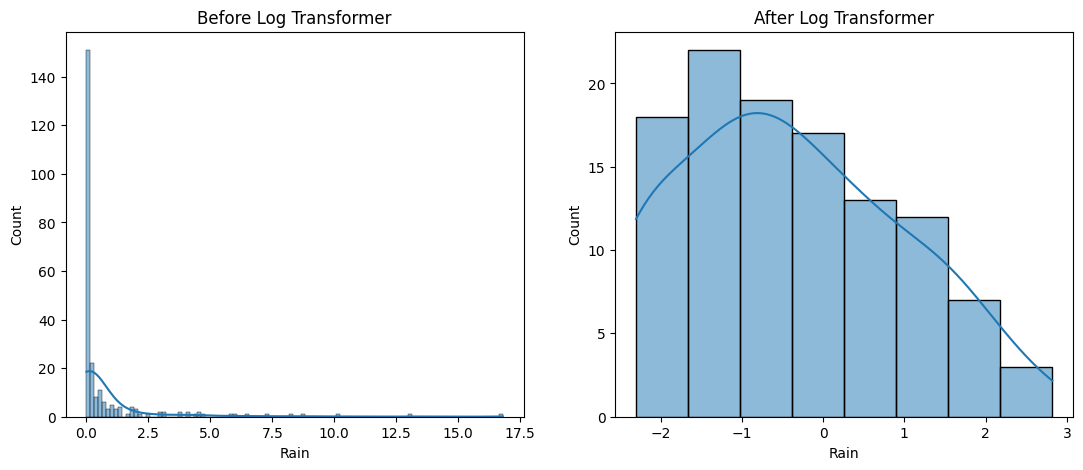

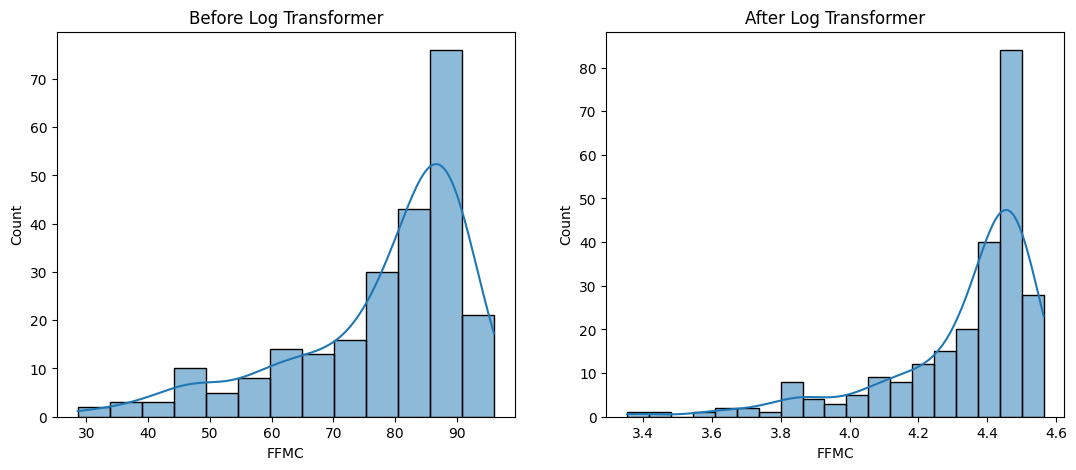

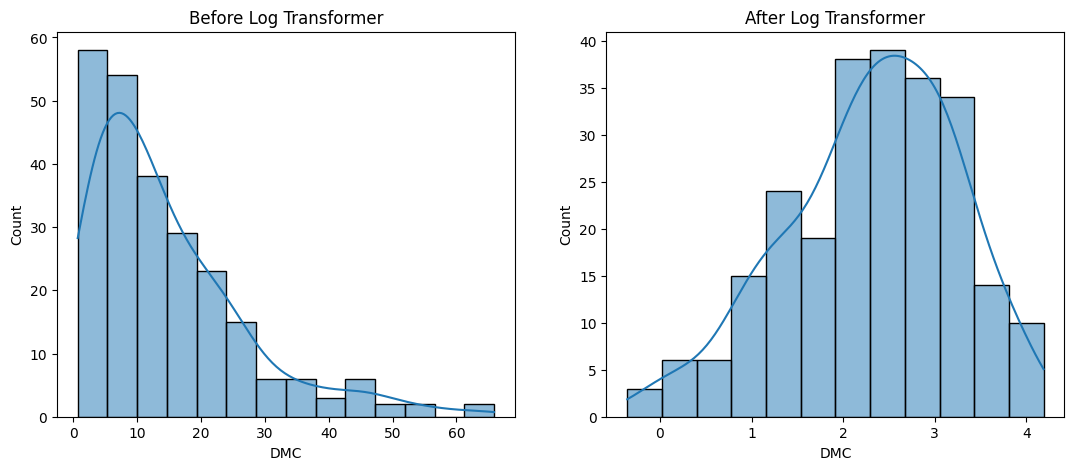

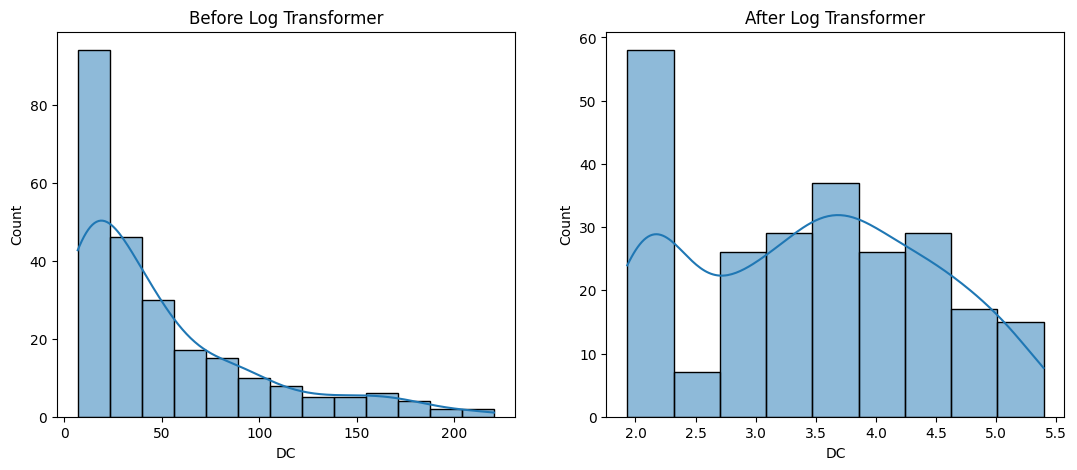

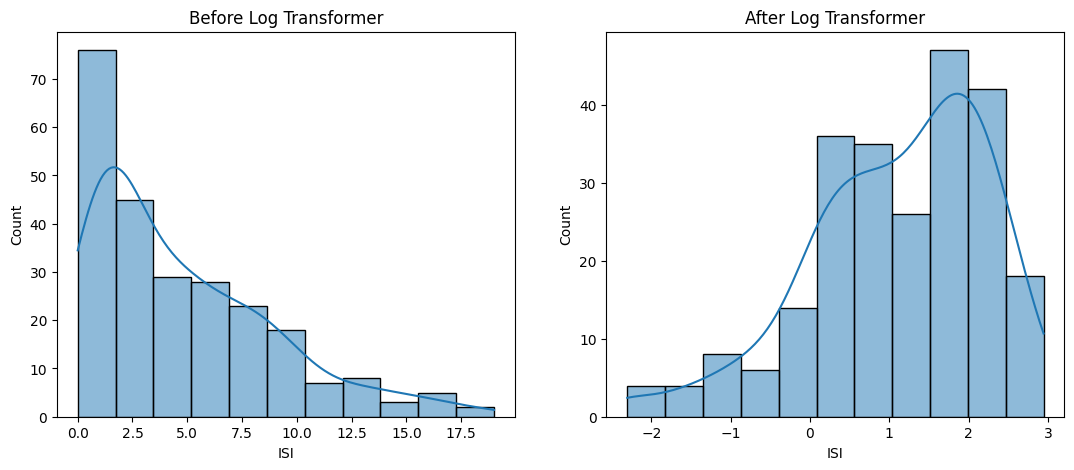

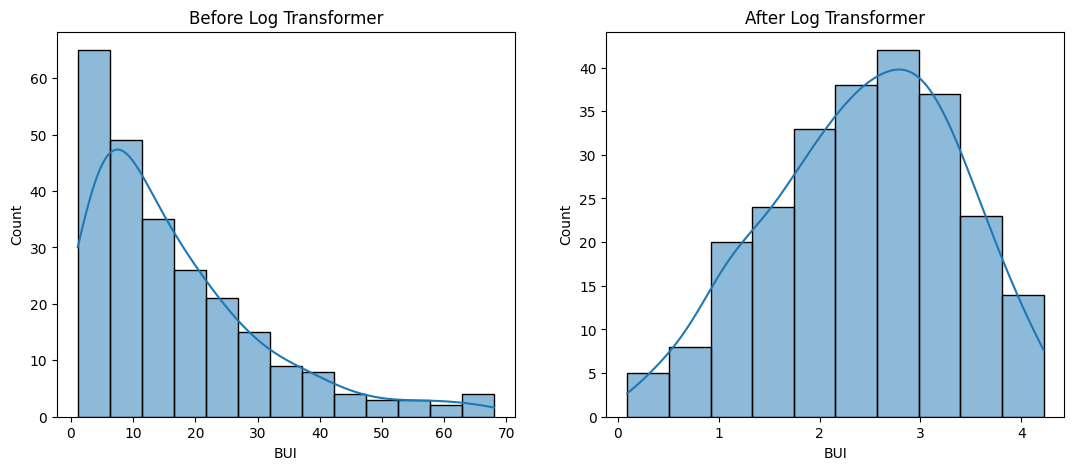

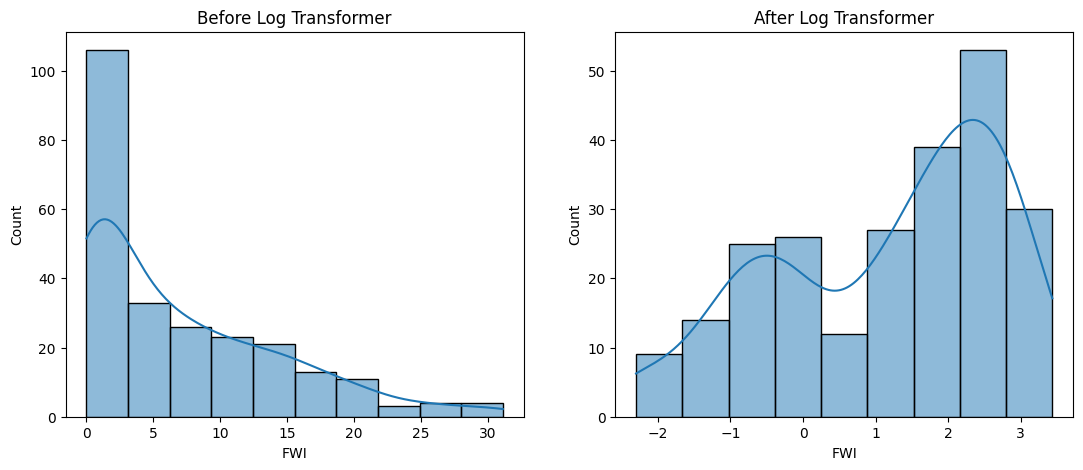

In [71]:
for feature in df_temp.columns:
    log_trans(df,feature)

# Observation : We can see some of the skewness were removed after the log function tranformer

In [74]:
def qq_plot(df,var):
    t=np.log(df[var])
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.histplot(df[var],kde='True')
    plt.title('PDF')
    plt.subplot(122)
    stats.probplot(df[var],dist='norm',plot=plt)
    plt.title('QQ Plot')

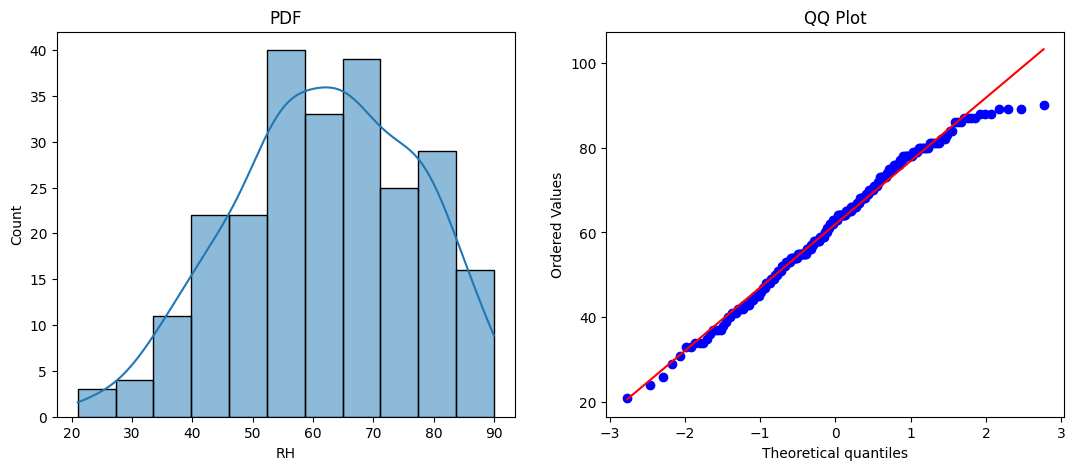

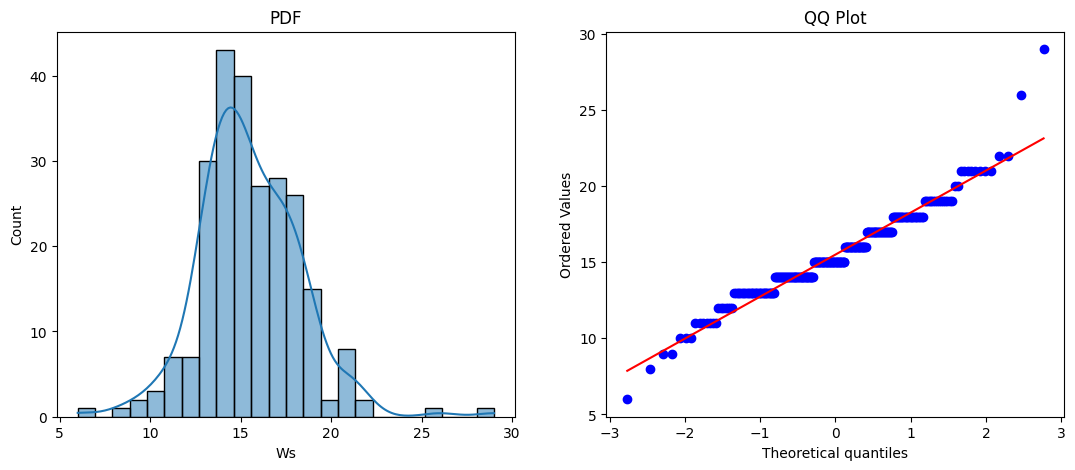

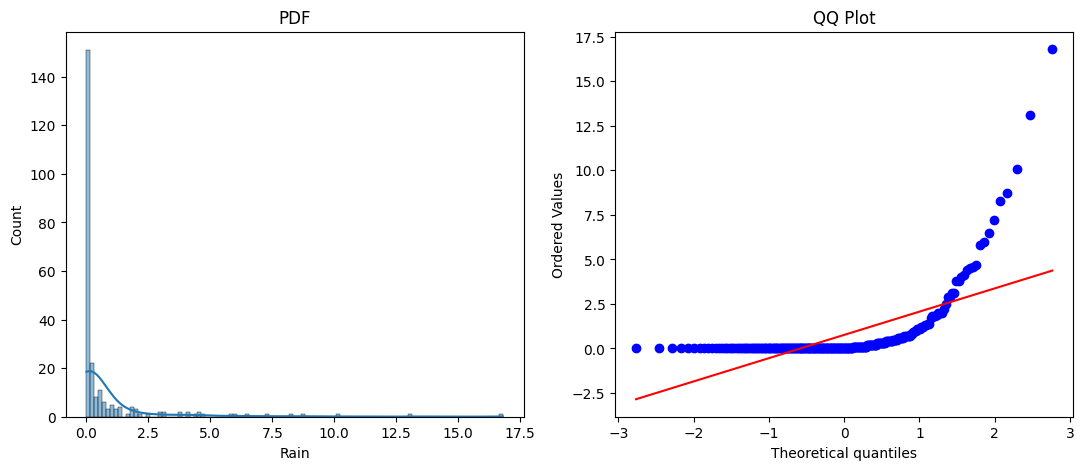

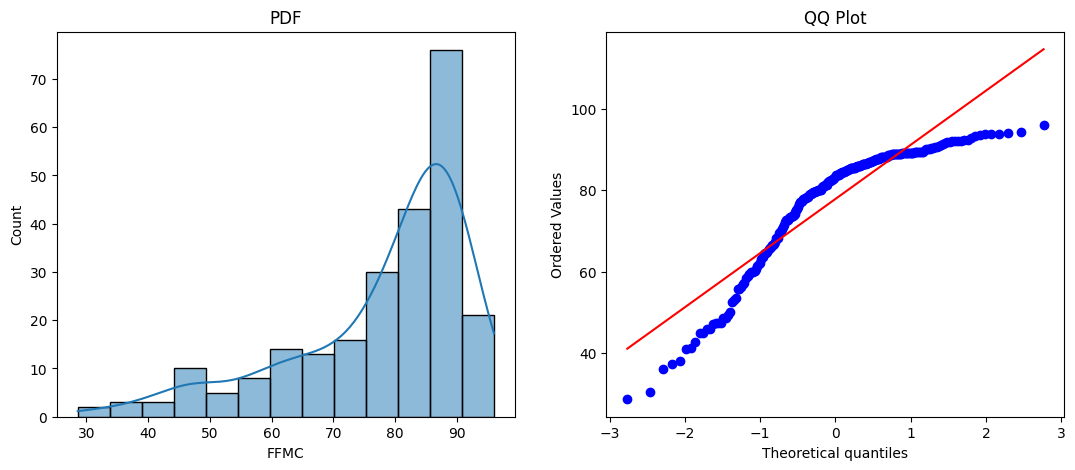

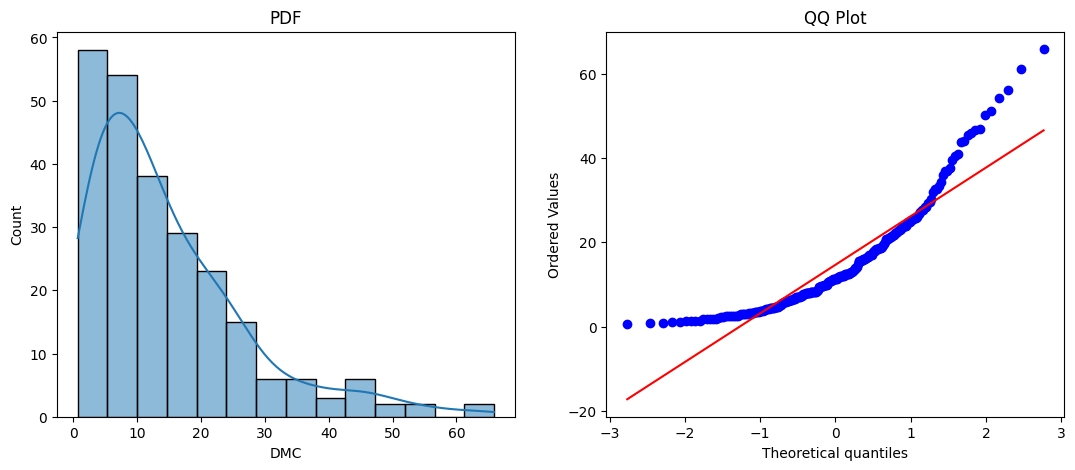

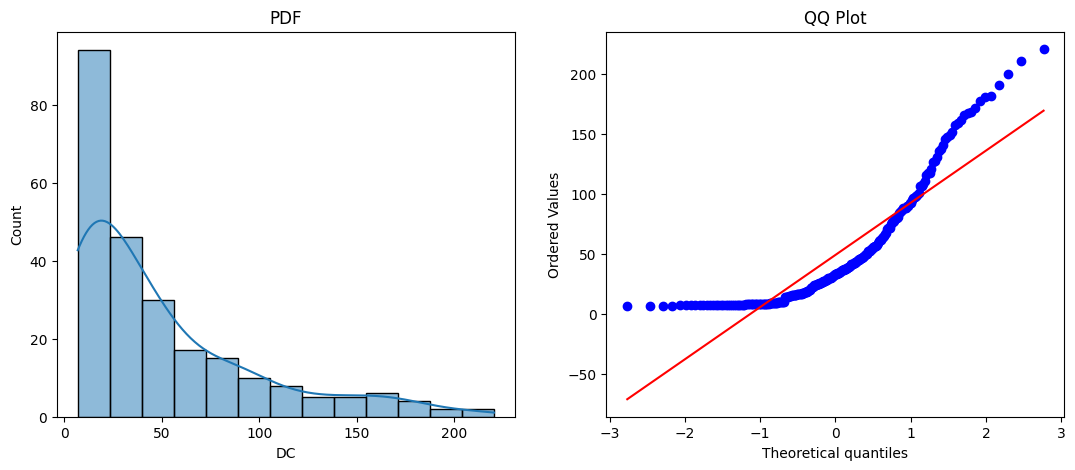

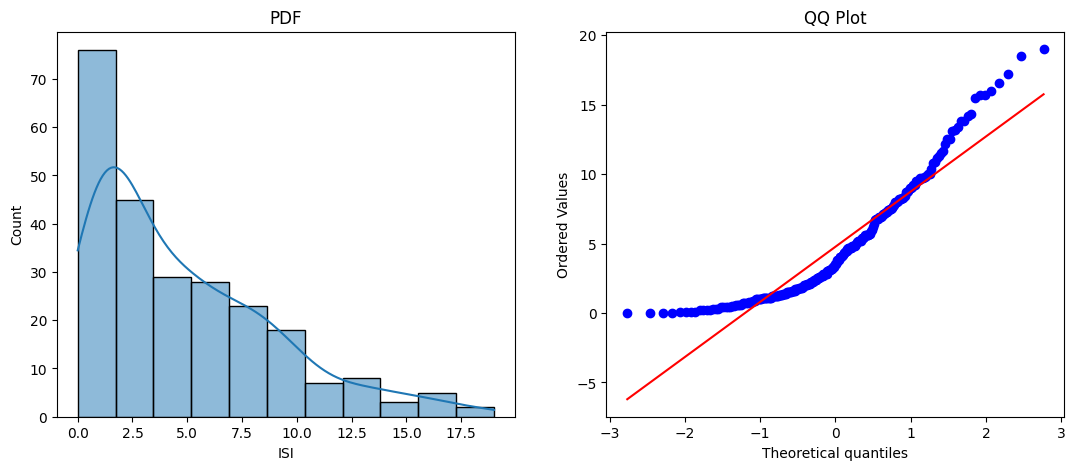

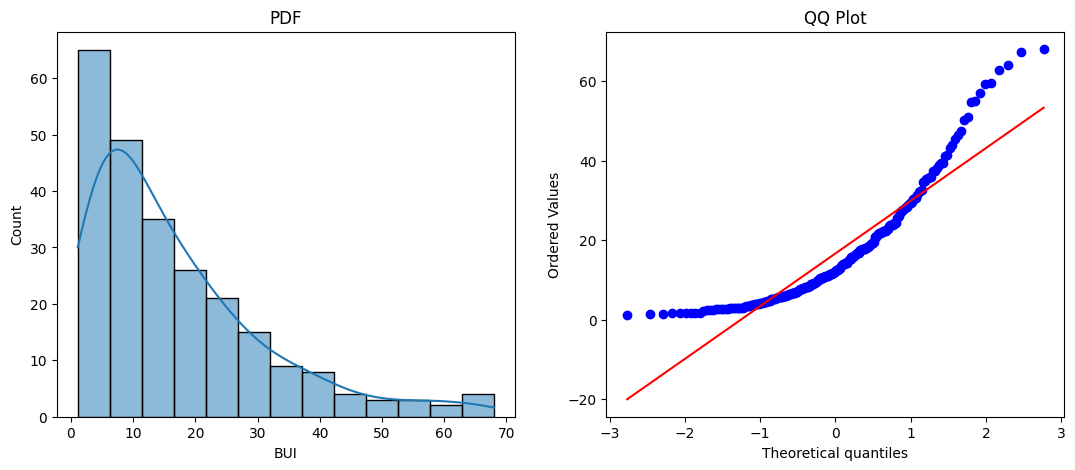

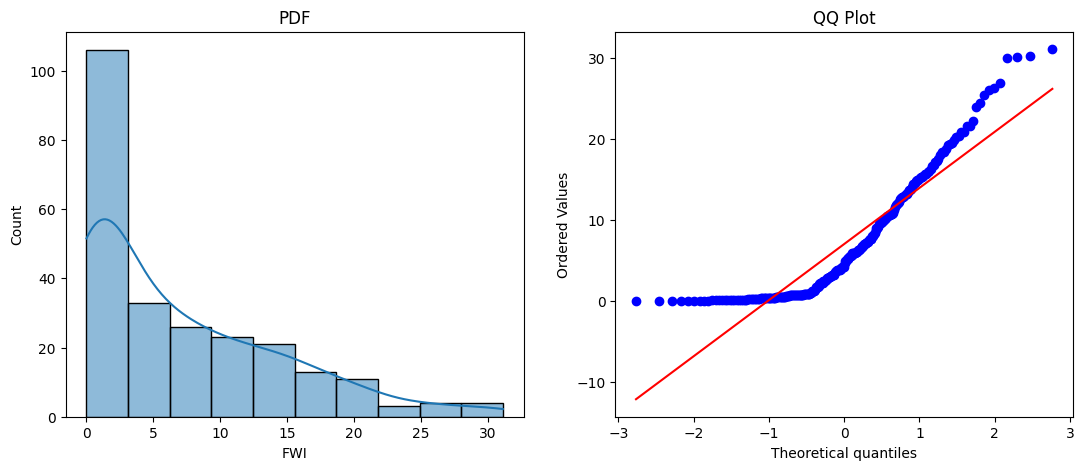

In [75]:
for feature in df_temp.columns:
    qq_plot(df,feature)

In [86]:
def power_transformer(df,var):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('Before Power Transformer')
    plt.subplot(122)
    p1=PowerTransformer().fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After Power Transformer')

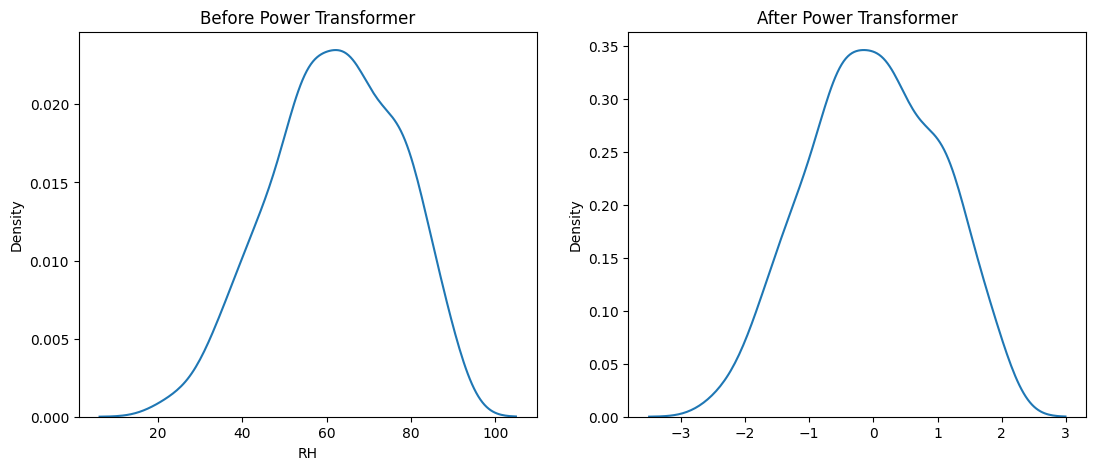

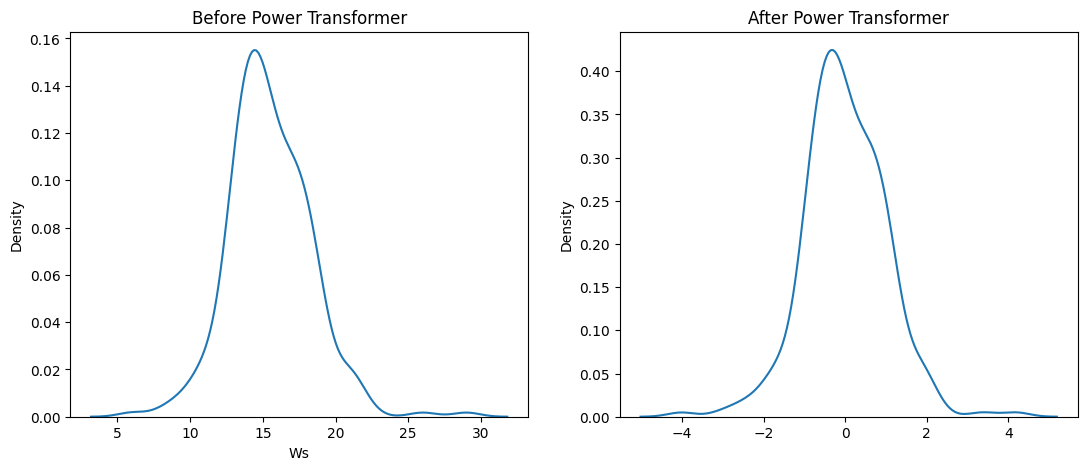

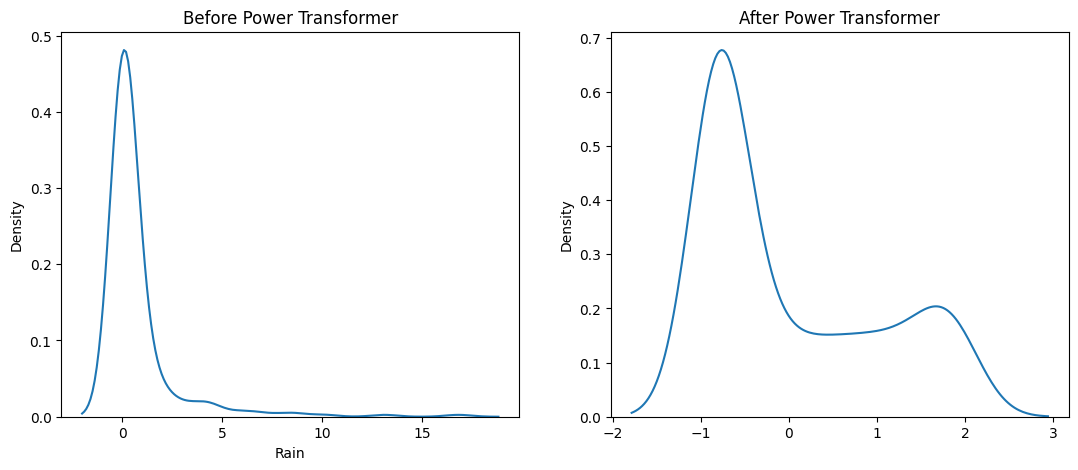

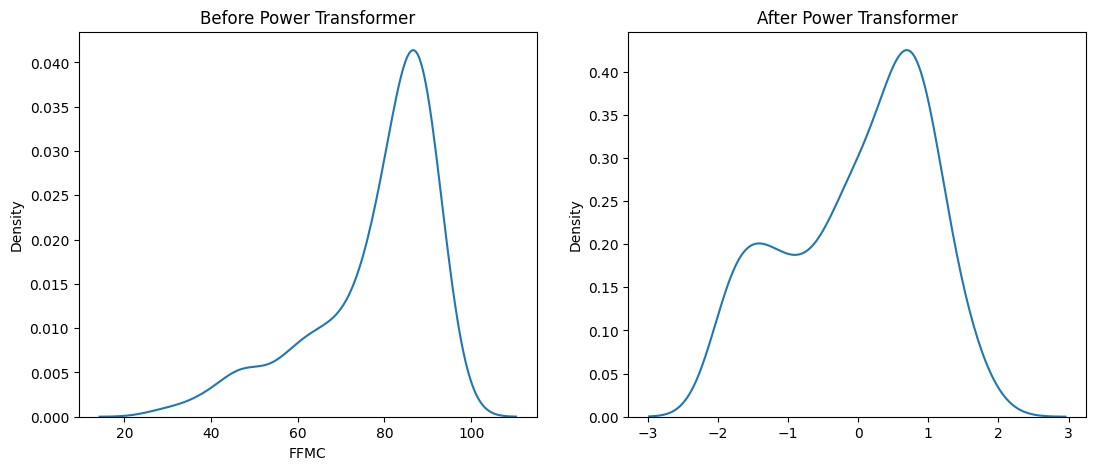

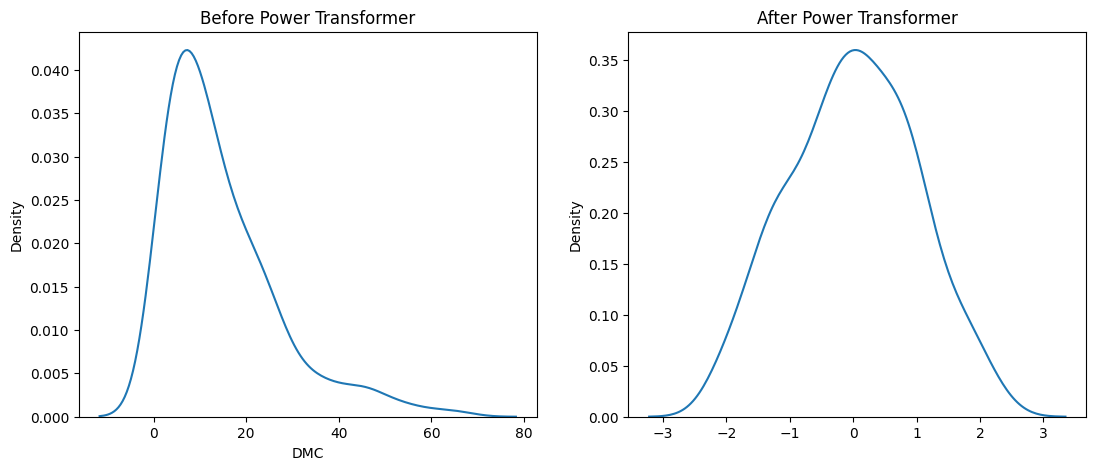

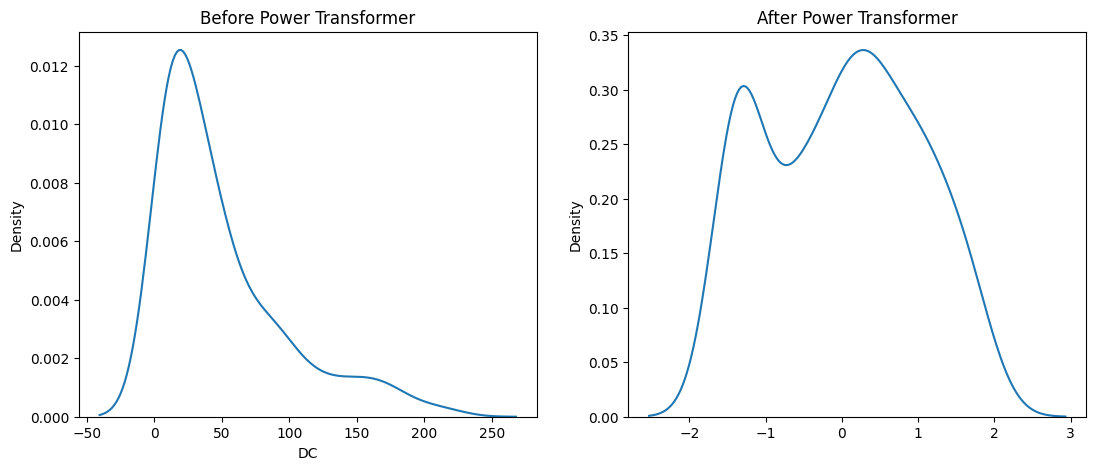

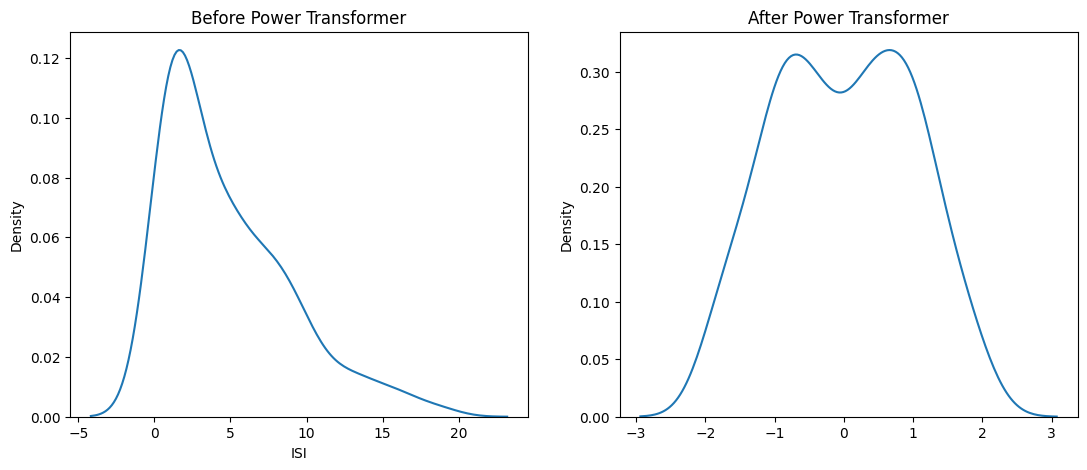

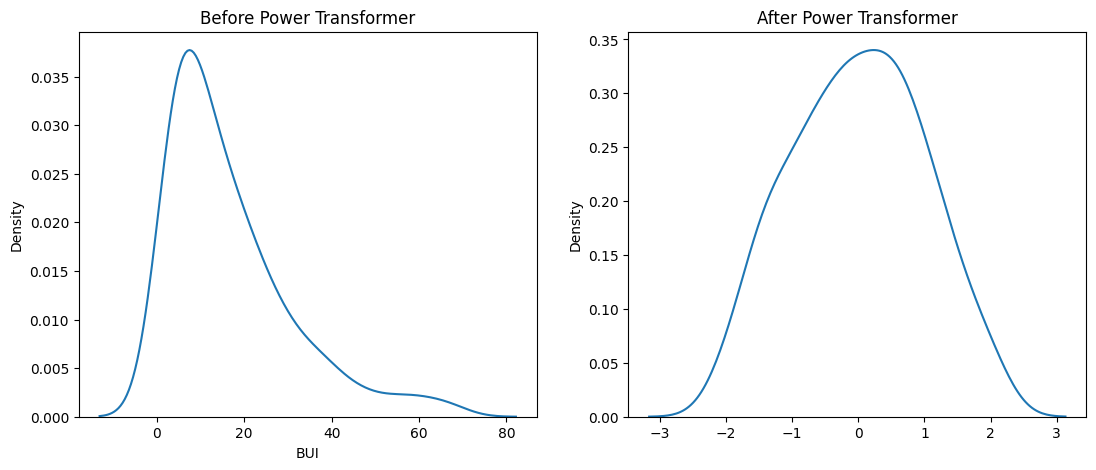

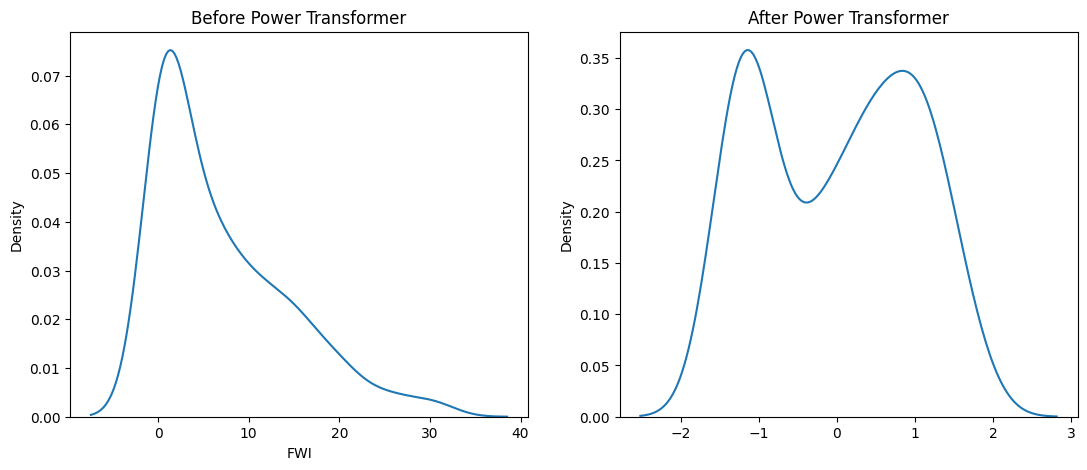

In [87]:
for feature in df_temp.columns:
    power_transformer(df,feature)

# Observation: From the tranformation graph we could see that the log tranformer has done the better transformation

<BarContainer object of 173 artists>

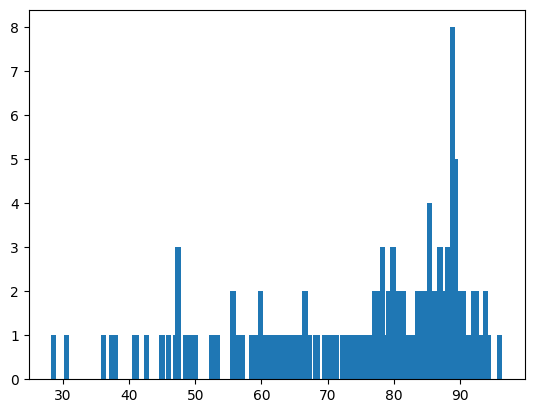

In [93]:
FFMC_group=df.groupby(['FFMC'])['FFMC'].count()
plt.bar(FFMC_group.index,FFMC_group)

<BarContainer object of 198 artists>

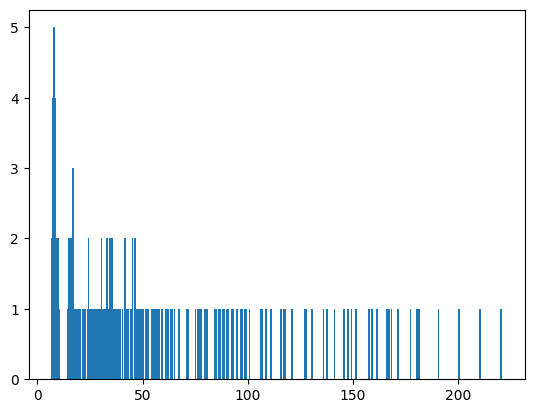

In [94]:
DC_group=df.groupby(['DC'])['DC'].count()
plt.bar(DC_group.index,DC_group)

# Observation : Upsamppling/ Downsampling is required

# Fine now will try to get some insights from the analysis

# Q1 - What is the min Temperature & max Temperture ?

# Q2 - Which month is the hottest one ?

# Q3 - Which month sees the most Rain ? 

# Q4 - which month has most no. of fire days recorded ?

In [95]:
df['Temperature'].min()

22

In [96]:
df['Temperature'].max()

42

In [106]:
df.groupby('month')['Temperature'].sum()

month
6    1848
7    2049
8    2191
9    1762
Name: Temperature, dtype: int64

In [107]:
df.groupby('month')['Rain'].sum()

month
6    58.5
7    28.0
8    27.8
9    71.3
Name: Rain, dtype: float64

In [112]:
df.groupby(['month','Classes'])['Classes'].count()

month  Classes
6      0          35
       1          25
7      0          23
       1          39
8      0          11
       1          51
9      0          37
       1          23
Name: Classes, dtype: int64

# Answer

# Q1 - What is the min Temperature & max Temperture ?
    Min -> 22 Max -> 42

# Q2 - Which month is the hottest one ?
    8 -> August Month

# Q3 - Which month sees the most Rain ? 
    9 -> September Month


# Q4 - which month has most no. of fire records recorded ?
    8 -> August Month has recorded 51 times as "fired"

In [193]:
df_temp

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...
241,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


<Axes: >

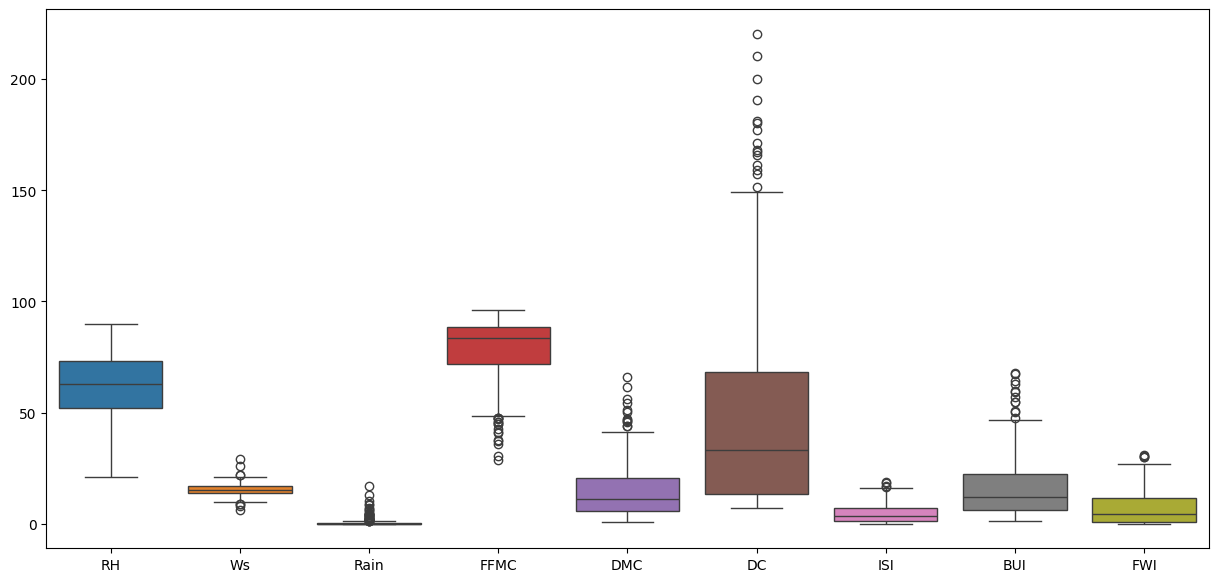

In [119]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_temp,ax=ax)

In [152]:
df2=df_temp.copy()

<Axes: >

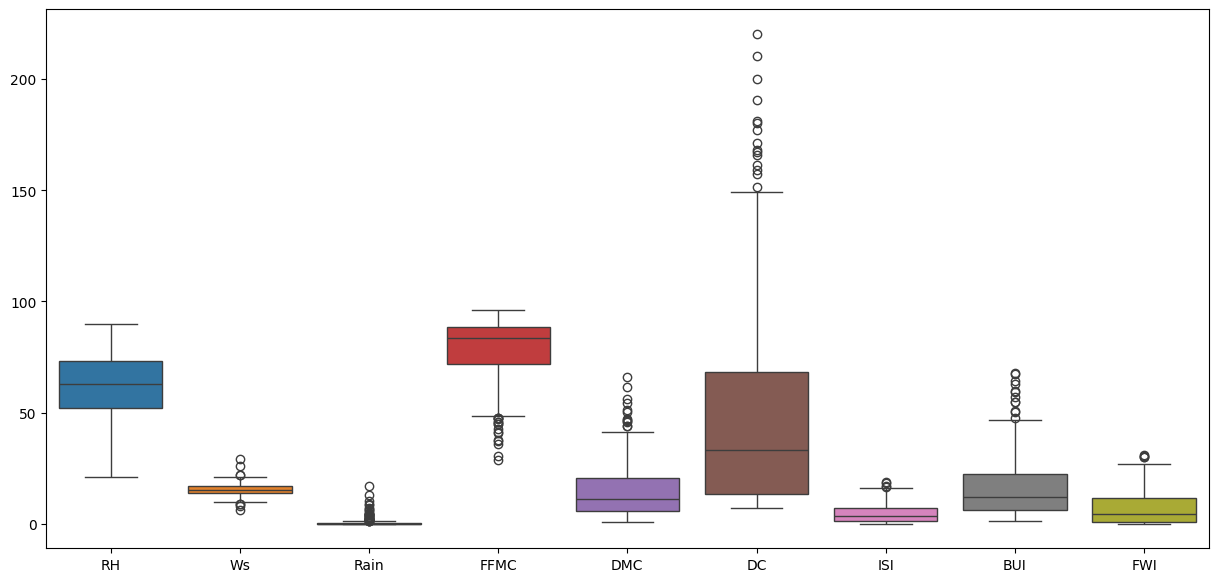

In [153]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df2,ax=ax)

In [154]:
df2.columns

Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

In [161]:
df2=df_temp.copy()
df2.describe()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.049590
std,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.428554
min,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [164]:
df2=df_temp.copy()

def Outliers(df,feature):
    percentile_25=df[feature].quantile(0.25)
    percentile_75=df[feature].quantile(0.75)
    print("percentile_25: ",percentile_25)
    print("percentile_75: ",percentile_75)
    iqr = percentile_75 - percentile_25

    upper_limit=round(percentile_75+(1.5*iqr),2)
    lower_limit=round(percentile_25-(1.5*iqr),2)
    print("upper_limit: ",upper_limit)
    print("lower_limit: ",lower_limit)
    print(f"{feature} Unique Value Before : ", df[feature].unique())
    df[feature]=np.where(df[feature]>upper_limit,upper_limit,np.where(df[feature]<lower_limit,lower_limit,df[feature]))
    print(f"{feature} Unique Value After : ", df[feature].unique())

for feature in df2.columns:
    Outliers(df2,feature)
    print("")


percentile_25:  52.0
percentile_75:  73.25
upper_limit:  105.12
lower_limit:  20.12
RH Unique Value Before :  [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]
RH Unique Value After :  [57. 61. 82. 89. 77. 67. 54. 73. 88. 79. 65. 81. 84. 78. 80. 55. 62. 66.
 64. 53. 47. 50. 68. 75. 76. 63. 69. 70. 59. 48. 45. 60. 51. 52. 58. 86.
 74. 71. 49. 44. 41. 42. 90. 87. 72. 46. 37. 36. 56. 43. 83. 29. 34. 33.
 35. 39. 31. 21. 40. 24. 38. 26.]

percentile_25:  14.0
percentile_75:  17.0
upper_limit:  21.5
lower_limit:  9.5
Ws Unique Value Before :  [18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]
Ws Unique Value After :  [18.  13.  21.5 16.  14.  15.  12.  19.  21.  20.  17.  11.  10.   9.5]

percentile_25:  0.0
percentile_75:  0.5
upper_limit:  1.25
lower_limit:  -0.75
Rain Unique Value Before :  [ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3

<Axes: >

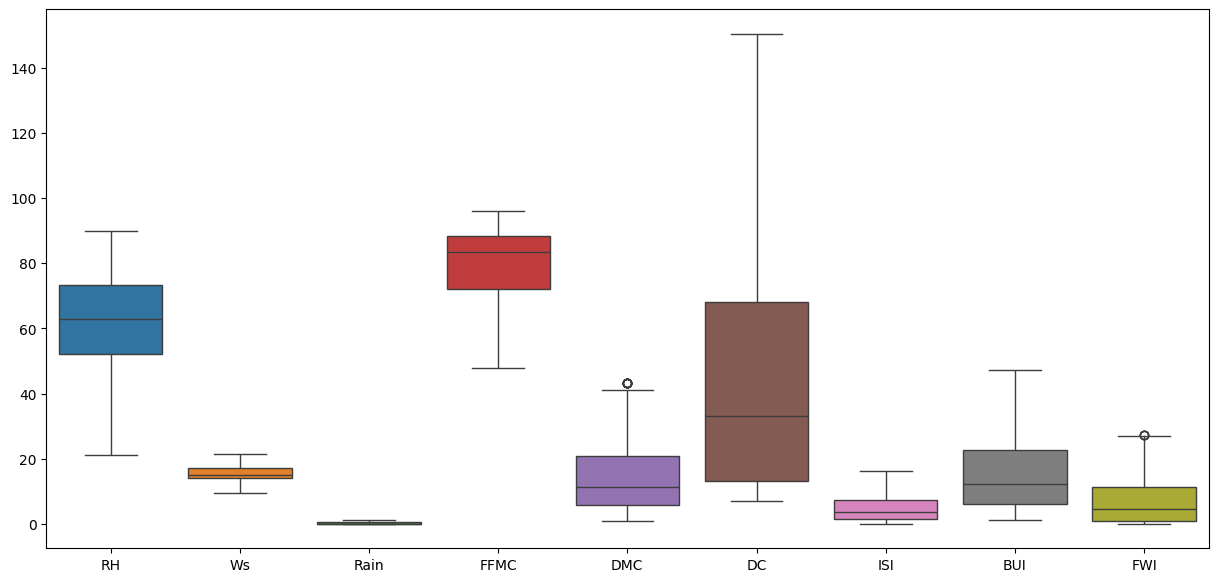

In [170]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df2,ax=ax)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.6 KB


In [183]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [192]:
df['Temperature'].unique()

array([29, 26, 25, 27, 31, 33, 30, 28, 32, 34, 35, 36, 37, 22, 24, 38, 39,
       40, 42], dtype=int64)

In [182]:
df2.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57.0,18.0,0.00,65.70,3.4,7.6,1.3,3.4,0.5
1,61.0,13.0,1.25,64.40,4.1,7.6,1.0,3.9,0.4
2,82.0,21.5,1.25,47.74,2.5,7.1,0.3,2.7,0.1
3,89.0,13.0,1.25,47.74,1.3,6.9,0.0,1.7,0.0
4,77.0,16.0,0.00,64.80,3.0,14.2,1.2,3.9,0.5


In [187]:
len(df['Classes'])

244

In [188]:
df2['day']=df['day']
df2['month']=df['month']
df2['Classes']=df['Classes']

In [189]:
df2.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,day,month,Classes
0,57.0,18.0,0.00,65.70,3.4,7.6,1.3,3.4,0.5,1,6,0
1,61.0,13.0,1.25,64.40,4.1,7.6,1.0,3.9,0.4,2,6,0
2,82.0,21.5,1.25,47.74,2.5,7.1,0.3,2.7,0.1,3,6,0
3,89.0,13.0,1.25,47.74,1.3,6.9,0.0,1.7,0.0,4,6,0
4,77.0,16.0,0.00,64.80,3.0,14.2,1.2,3.9,0.5,5,6,0


In [190]:
df2.to_csv('Model_ready_data.csv')